0 1
10 2
50 3
100 4


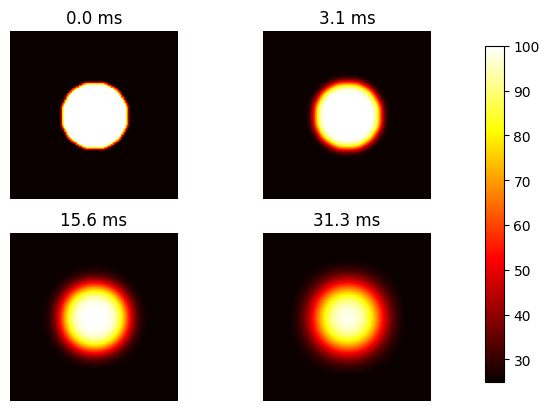

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# plate size, mm
w = h = 10.
# intervals in x-, y- directions, mm
dx = dy = 0.1
# Thermal diffusivity of steel, mm2.s-1
D = 8.

Tcool, Thot = 25, 100

nx, ny = int(w/dx), int(h/dy)

dx2, dy2 = dx*dx, dy*dy
dt = dx2 * dy2 / (2 * D * (dx2 + dy2))

u0 = Tcool * np.ones((nx, ny))
u = np.empty((nx, ny))

# Initial conditions - ring of inner radius r, width dr centred at (cx,cy) (mm)
r, cx, cy = 2, 5, 5
r2 = r**2
for i in range(nx):
    for j in range(ny):
        p2 = (i*dx-cx)**2 + (j*dy-cy)**2
        if p2 < r2:
            u0[i,j] = Thot

def do_timestep(u0, u):
    # Propagate with forward-difference in time, central-difference in space
    u[1:-1, 1:-1] = u0[1:-1, 1:-1] + D * dt * (
          (u0[2:, 1:-1] - 2*u0[1:-1, 1:-1] + u0[:-2, 1:-1])/dx2
          + (u0[1:-1, 2:] - 2*u0[1:-1, 1:-1] + u0[1:-1, :-2])/dy2 )

    u0 = u.copy()
    return u0, u

# Number of timesteps
nsteps = 101000
# Output 4 figures at these timesteps
mfig = [0, 10, 50, 100]
fignum = 0
fig = plt.figure()
for m in range(nsteps):
    u0, u = do_timestep(u0, u)
    if m in mfig:
        fignum += 1
        print(m, fignum)
        ax = fig.add_subplot(220 + fignum)
        im = ax.imshow(u.copy(), cmap=plt.get_cmap('hot'), vmin=Tcool,vmax=Thot)
        ax.set_axis_off()
        ax.set_title('{:.1f} ms'.format(m*dt*1000))
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.9, 0.15, 0.03, 0.7])
cbar_ax.set_xlabel('$T$ / K', labelpad=20)
fig.colorbar(im, cax=cbar_ax)
plt.show()

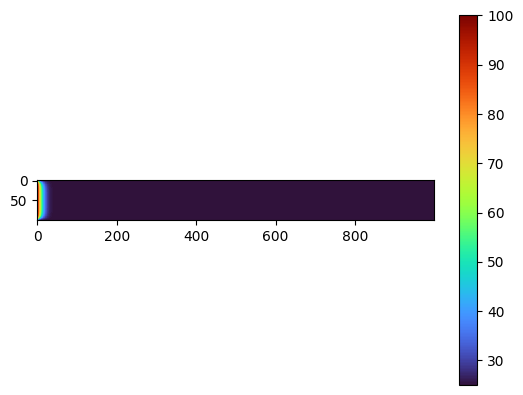

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize the grid with a 100 degree wall on the left side
nx = 100  # Number of grid points in x direction
ny = 1000  # Number of grid points in y direction
dx = 1.0  # Spacing between grid points in x direction
dy = 1  # Spacing between grid points in y direction
dt = 0.1  # Time step
k = 238  # Thermal conductivity
rho= 2.700 #Density
Cp= 929 #Cp


grid = np.zeros((nx, ny))+25
grid[:, 0] = 100.0

# Time-stepping loop
for t in range(10000):
    grid[1:-1, 1:-1] = grid[1:-1, 1:-1] + (dt) * k /(rho * Cp) * (
        (grid[2:, 1:-1] - 2 * grid[1:-1, 1:-1] + grid[:-2, 1:-1]) / dx**2 +
        (grid[1:-1, 2:] - 2 * grid[1:-1, 1:-1] + grid[1:-1, :-2]) / dy**2)

# Plot the final temperature distribution
plt.imshow(grid, cmap='turbo', interpolation='nearest')
plt.colorbar()
plt.show()

In [18]:
import numpy as np
import matplotlib.pyplot as plt

nx = 100 # length
dx=1 #grid space
dt = 100  # Time step
k = 1  # Thermal conductivity
rho=1
Cp=1

T = np.ones(nx) +25

for n in range(dt+1):               #time marching
    un = u.copy()       
    for i in range(1, nx-1):        #Space marching
        T[i] = T[i] +  dt * k * ((T(i+1) - 2 * T(i) + T(i-1))/dx**2,

                                 
plt.plot(np.linspace(0,2,nx), T, label='Numerical Solution')
plt.title('1D Diffusion Convecction')
plt.xlabel('Grid Space')
plt.ylabel('Velocity')
plt.legend()
plt.show()                

SyntaxError: invalid syntax (1590047439.py, line 20)

Solving 1D Diffusion Equation using Finite Difference Method

------------------------------------------------
Computing Innitial Solution...
Printing Innitial Solution...
------------------------------------------------
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
------------------------------------------------
Calculating Numerical Solution......
------------------------------------------------
------------------------------------------------
Printing Numerical Solution......
------------------------------------------------
[1.   1.01 1.03 1.06 1.09 1.14 1.2  1.27 1.36 1.45 1.54 1.63 1.71 1.77
 1.81 1.82 1.81 1.77 1.71 1.63 1.54 1.45 1.36 1.27 1.2  1.14 1.09 1.06
 1.03 1.02 1.01 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.  ]
------------------------------------------------
Plotting Innitial & Numerical Solution
------------------------------------------------


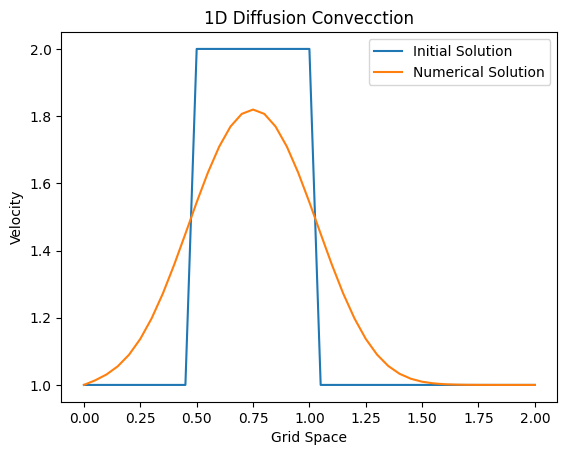

In [6]:
import numpy                    #here we load numpy library that provides a bunch of useful matrix operations akin to MATLAB
from matplotlib import pyplot   #2D plotting library that we will use to plot our results

lineSingle = '------------------------------------------------'

print("Solving 1D Diffusion Equation using Finite Difference Method\n")

#setting the grid

nx = 41                     #grid points
dx  = 2 / (nx - 1)          #grid spacing   
nt = 20                     #number of timesteps
nu = 0.3                    #viscosity
cfl = 0.4                   
dt = cfl*dx**2/nu           #based on von neumaan stability analysis

#innitial condition

print(lineSingle)
print("Computing Innitial Solution...")


u = numpy.ones(nx)                  
u[int(0.5/dx):int(1/dx+1)] = 2      #Square Wave Profile

print("Printing Innitial Solution...")
print(lineSingle)

print(u)

pyplot.plot(numpy.linspace(0,2,nx), u, label='Initial Solution')

#discritization

print(lineSingle)
print("Calculating Numerical Solution......")
print(lineSingle)

un = numpy.ones(nx)  

for n in range(nt+1):               #time marching
    un = u.copy()       
    for i in range(1, nx-1):        #Space marching
        
        u[i] = un[i] + nu * dt/dx**2 *(un[i+1] - 2*un[i] + un[i-1]) #Central Differnece Scheme

print(lineSingle)
print("Printing Numerical Solution......")
print(lineSingle)
        
print(u)

print(lineSingle)
print("Plotting Innitial & Numerical Solution")
print(lineSingle)

pyplot.plot(numpy.linspace(0,2,nx), u, label='Numerical Solution')
pyplot.title('1D Diffusion Convecction')
pyplot.xlabel('Grid Space')
pyplot.ylabel('Velocity')

pyplot.legend()
pyplot.show()

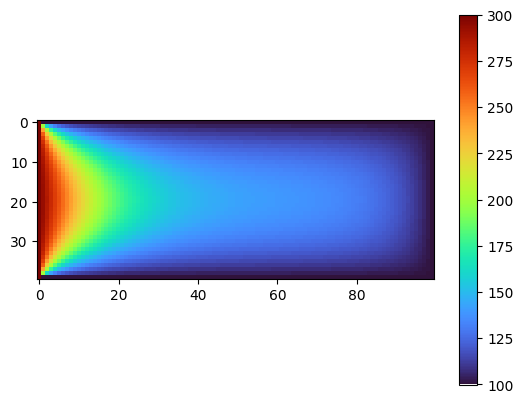

In [42]:
import numpy as np
import matplotlib.pyplot as plt


nx = 40  # Number of grid points in x direction = height of the bar 
ny = 100  # Number of grid points in y direction = length of the bar 
dt = 0.1  # Time step
dx = 1  # Spacing between grid points in x direction 
dy = 1  # Spacing between grid points in y direction
k = 238  # Thermal conductivity
rho= 2.700 #Density
Cp= 929 #Cp
P=50 # Puissance spécifique


grid = np.zeros((nx, ny))+ 100
grid[:, 0] = 300.0

# Time-stepping loop
for t in range(100000):
    grid[1:-1, 1:-1] = grid[1:-1, 1:-1] + (dt) /(rho * Cp) * (P + k * (
        (grid[2:, 1:-1] - 2 * grid[1:-1, 1:-1] + grid[:-2, 1:-1]) / dx**2 +
        (grid[1:-1, 2:] - 2 * grid[1:-1, 1:-1] + grid[1:-1, :-2]) / dy**2))

# Plot the final temperature distribution
plt.imshow(grid, cmap='turbo', interpolation='nearest')
plt.colorbar()
plt.show()

time=
10000.0
s


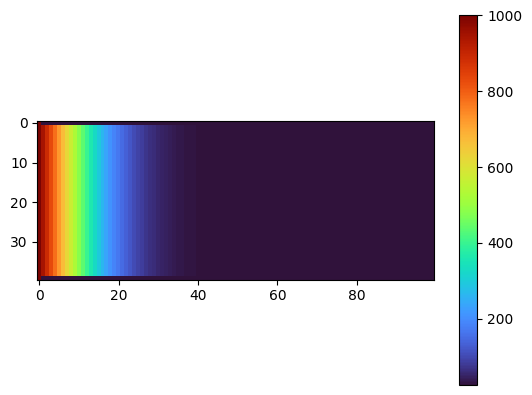

In [54]:
import numpy as np
import matplotlib.pyplot as plt

dt = 0.1  
dx = 1 
dy = 1 

#Parametrès à varier
nx = 40 #Hauteur de la barre  
ny = 100  #Largeur de la barre
k = 238  #Coefficient de conduction 
rho= 27 #Densité
Cp= 929 #chaleur massique
P=0 # Puissance spécifique
a=98.8*10**(-6)
tmax=100000 #nombre d'itérations (=1/10 du temps final)

grid = np.zeros((nx, ny))+ 25
grid[:, 0] = 1000.0

# Time-stepping loop
for t in range(tmax):
    grid[1:-1, 1:-1] = grid[1:-1, 1:-1] + (dt) /(rho * Cp) * (P + k * (
        (grid[1:-1, 2:] - 2 * grid[1:-1, 1:-1] + grid[1:-1, :-2]) / dy**2))

u=tmax*dt
# Plot the final temperature distribution
print('time=') 
print(u) 
print('s')
plt.imshow(grid, cmap='turbo', interpolation='nearest')
plt.colorbar()
plt.show()

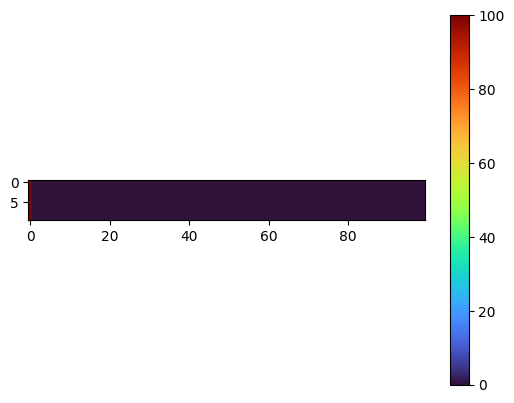

In [2]:
import numpy as np
import matplotlib.pyplot as plt


nx = 10  # Number of grid points in x direction = height of the bar 
ny = 100  # Number of grid points in y direction = length of the bar 
dx = 1  # Spacing between grid points in x direction 
dy = 1  # Spacing between grid points in y direction
k = 238  # Thermal conductivity
rho= 2.700 #Density
Cp= 929 #Cp
P=5 # Puissance spécifique


grid = np.zeros((nx, ny))
grid[:, 0] = 100.0
grid[1:-1, 1:-1] = grid[1:-1, 1:-1] - P / k * (dx**2 + dy**2)


# Plot the final temperature distribution
plt.imshow(grid, cmap='turbo', interpolation='nearest')
plt.colorbar()
plt.show()

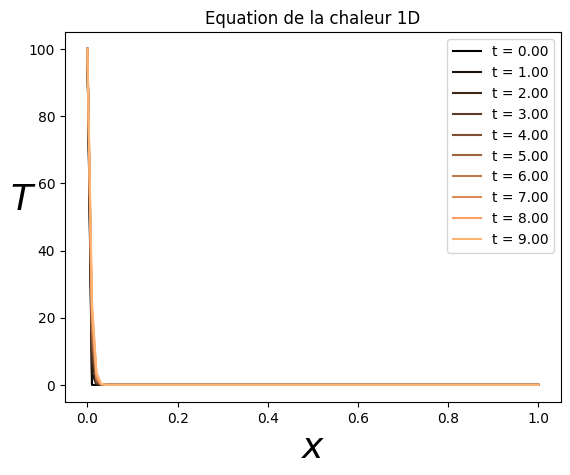

In [51]:
import numpy as np
import matplotlib.pyplot as plt

# PHYSICAL PARAMETERS

L = 1.0     #Domain size
Time = 10  #Integration time
k = 238  # Thermal conductivity
rho= 2702 #Density
Cp= 929 #Cp
P=50 # Puissance spécifique
a=k/(rho*Cp)
# NUMERICAL PARAMETERS
NX = 100    #Number of grid points
NT = 100000   #Number of time steps

dx = L/(NX-1)  #Grid step (space)
dt = Time/NT   #Grid step (time)


### MAIN PROGRAM ###

# Initialisation
x = np.linspace(0,1,NX)
T = np.zeros((NX))
T[0]=100
RHS = np.zeros((NX))

plt.figure()

# Main loop
for n in range(0,NT):

   for j in range (1, NX-1):
      RHS[j] = dt*(P/(rho*Cp)+a*(T[j-1]-2*T[j]+T[j+1])/(dx**2))

   for j in range (1, NX-1):
      T[j] += RHS[j]

#Plot every 100 time steps
   if (n%10000 == 0):
      plotlabel = "t = %1.2f" %(n * dt)
      plt.plot(x,T, label=plotlabel,color = plt.get_cmap('copper')(float(n)/NT))
      

plt.xlabel(u'$x$', fontsize=26)
plt.ylabel(u'$T$', fontsize=26, rotation=0)
plt.title(u'Equation de la chaleur 1D')
plt.legend()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# PHYSICAL PARAMETERS
Lx = 1.0     #Domain size
Ly= 1
Time = 0.1  #Integration time
k = 238  # Thermal conductivity
rho= 2.700 #Density
Cp= 929 #Cp
P=50 # Puissance spécifique
a=k/(rho*Cp)

# NUMERICAL PARAMETERS
NX = 100    #Number of grid points
NY=100
NT = 1000  #Number of time steps

dx = Lx/(NX-1)
dy = Ly/(NY-1)#Grid step (space)
dt = Time/NT   #Grid step (time)

grid = np.zeros((NX, NY))
grid[:, 0] = 100.0

### MAIN PROGRAM ###

# Initialisation
x = np.linspace(0.0,1.0,NX)
T = np.sin(2*np.pi*x)
RHS = np.zeros((NX))

plt.figure()

# Main loop
for n in range(0,NT):
        
    for j in range(1,NX-1):
        grid[1:-1, 1:-1] = grid[1:-1, 1:-1] + (dt)  * (P/(rho * Cp) + k * a * (
            (grid[2:, 1:-1] - 2 * grid[1:-1, 1:-1] + grid[:-2, 1:-1]) / dx**2 +
            (grid[1:-1, 2:] - 2 * grid[1:-1, 1:-1] + grid[1:-1, :-2]) / dy**2))

      
# Plot the final temperature distribution
plt.imshow(grid, cmap='turbo', interpolation='nearest')
plt.colorbar()
plt.show()

Time= 10.0 s


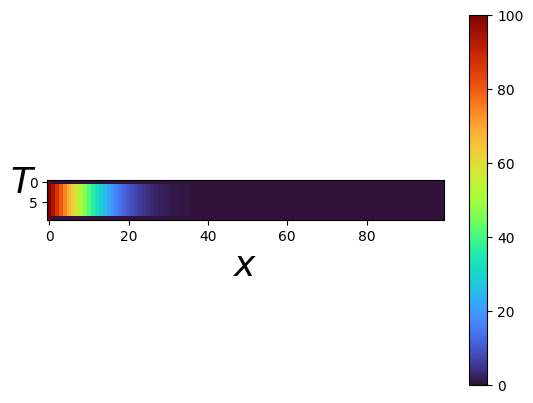

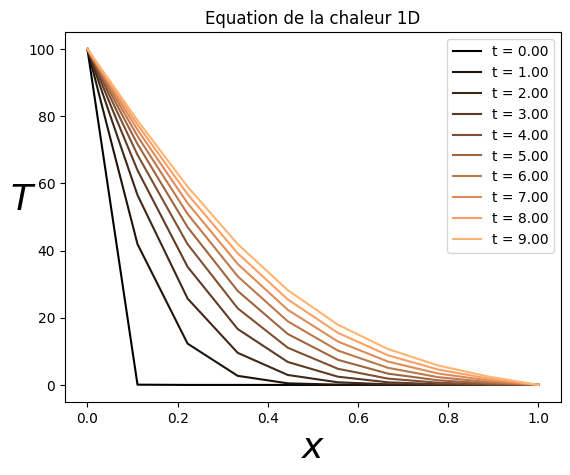

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# PHYSICAL PARAMETERS

Lx = 0.1     #Domain size
Ly= 1
Time = 10  #Integration time
k = 238  # Thermal conductivity
rho= 2702 #Density
Cp= 929 #Cp
P=0 # Puissance spécifique
a=k/(rho*Cp)

# NUMERICAL PARAMETERS
NX = 10    #Number of grid points
NY=100
NT = 10000  #Number of time steps

dx = Lx/(NX-1)
dy = Ly/(NY-1)#Grid step (space)
dt = Time/NT   #Grid step (time)

grid = np.zeros((NX, NY))
grid[:, 0] = 100.0


plt.figure()


for n in range(0,NT):
        
    for j in range(1,NX-1):
        grid[1:-1, 1:-1] = grid[1:-1, 1:-1] + (dt)  * (P/(rho * Cp) + a * (
            (grid[1:-1, 2:] - 2 * grid[1:-1, 1:-1] + grid[1:-1, :-2]) / dy**2))
tfin=NT*dt    
print('Time=', tfin, 's' )      

plt.imshow(grid, cmap='turbo', interpolation='nearest')
plt.xlabel(u'$x$', fontsize=26)
plt.ylabel(u'$T$', fontsize=26, rotation=0)
plt.colorbar()
plt.show()

x = np.linspace(0,Ly,NX)
T = np.zeros((NX))
T[0]=100
RHS = np.zeros((NX))

plt.figure()


for n in range(0,NT):

   for j in range (1, NX-1):
      RHS[j] = dt*(P/(rho*Cp)+a*(T[j-1]-2*T[j]+T[j+1])/(dx**2))

   for j in range (1, NX-1):
      T[j] += RHS[j]


   if (n%(NT/10) == 0):
      plotlabel = "t = %1.2f" %(n * dt)
      plt.plot(x,T, label=plotlabel,color = plt.get_cmap('copper')(float(n)/NT))
      

plt.xlabel(u'$x$', fontsize=26)
plt.ylabel(u'$T$', fontsize=26, rotation=0)
plt.title(u'Equation de la chaleur 1D')
plt.legend()
plt.show()

NameError: name 'T1' is not defined

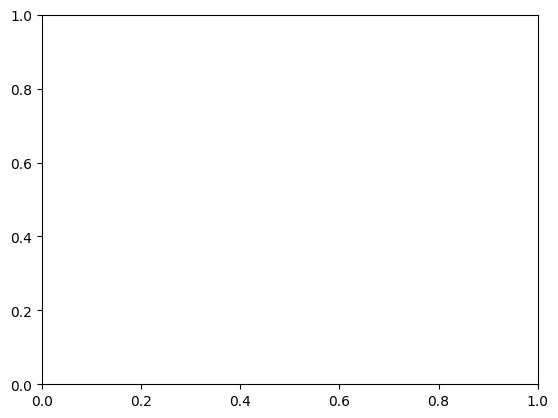

In [1]:
import matplotlib.pyplot as plt
import numpy as np

#Paramètres
Tint=25
Text=5
hint=7
hext=2
h12=1
e1=0.1
k1=1
e2=0.02
k2=.1

#Calcul du flux
q=(Tint-Text)/(1/hint+e1/k1+1/h12+e2/k2+1/hext)

#Différentes températures avec un flux constant
for d in range(0,int(e1+e2+1)):
    if (d==0):
        Tmuri=-q/hint+Tint
    if (0<d<e1):
        T1=Tmuri-q*e1/k1
    if (d==e1):
        Tinside=-q/h12+T1
    if (e1<d<e1+e2):
        T2=Tinside-q*e2/k2
    if (d==e1+e2):
        Tmure=-q/hext+T2
    
fig = plt.figure()
ax = plt.axes()
plt.plot([0, 0, e1,e1, e1+e2, e1+e2, e1+e2], [Tint, Tmuri, T1, Tinside, T2, Tmure, Text])
plt.xlabel(u'$EPAISSEUR [m]$')
plt.ylabel(u'$T[°C]$', rotation=0)
plt.title(u'Equation de la chaleur 1D')